In [14]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn pmdarima
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
#Me instalo pmdarima para poder usar el ARIMA más adelante


In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)


In [4]:
#Primero convierto las fechas a formato datetime para que sean utilizables
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

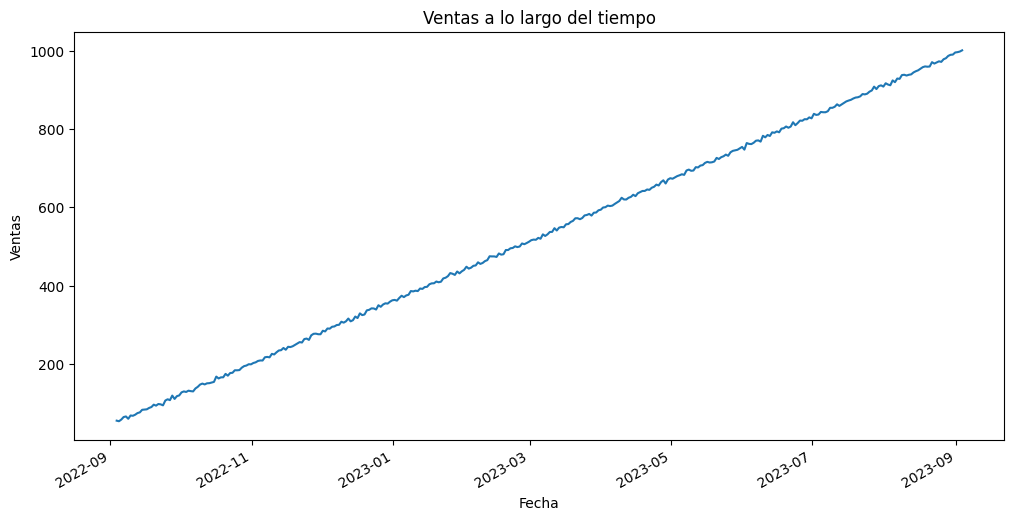

In [5]:
#Aquí me ploteo las ventas a lo largo del tiempo
df['sales'].plot(figsize=(12, 6), title="Ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

#La verdad es que parece un escenario irreal en el que hay una tendencia general
#muy clara que solamente se ve afectada por variaciones (las variaciones a simple
#vista sí que parecen aleatorias) a escala muy pequeña. Se puede simular esta gráfica
#en excel a base de elegir una cantidad de partida y luego sumarle una constante
#cada x tiempo. Para simular las variaciones aleatorias se le suma un aleatorio.entre(-x, +x)
#Lo que quiero decir es que los datos parecen tener una estructura muy clara, y por
#tanto si el modelo no es capaz de predecir esto es porque habré pasado algo por alto
#en su implementación

In [6]:
#Vemos que la serie es claramente no estacionara con un p-valor de 0.9862
#lo cual también es visualmente evidente, pero está bien aplicar este test
#porque también nos habla sobre la autocorrelación
#Esto también significa que ahora toca hacerla estacionara antes de aplicar el ARIMA
#Lo cual es tan fácil como restarle a cada valor el valor anteior
result = adfuller(df['sales'])
print(f"P-valor: {result[1]}")

P-valor: 0.9861899815311063


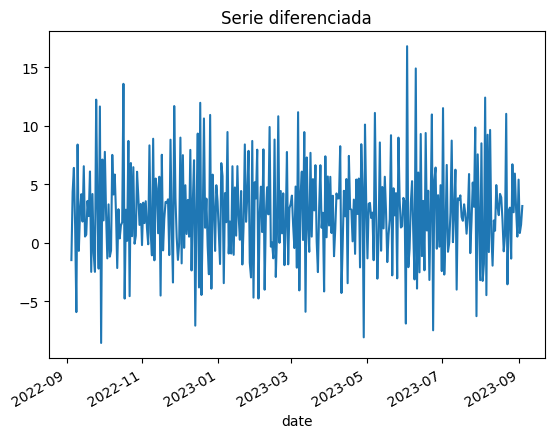

In [7]:
#Aquí es donde hago la diferenciación para dejarla estacionaria
#Con el ploteo podemos ver que ha funcionado
df['sales_diff'] = df['sales'].diff()
df['sales_diff'].dropna().plot()
plt.title("Serie diferenciada")
plt.show()

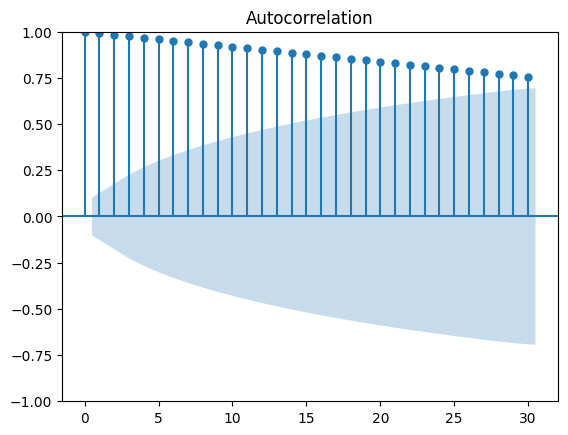

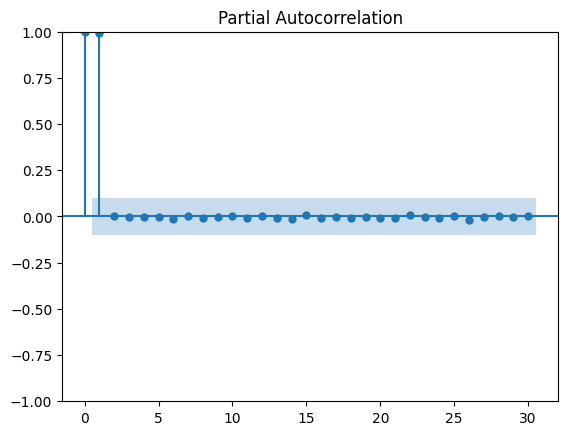

In [8]:
#Aquí ploteo tanto la autocorrelación como la autocorrelación parcial
plot_acf(df['sales'], lags=30)
plot_pacf(df['sales'], lags=30)
plt.show()

In [10]:
train_size = int(len(df) * 0.8)
train, test = df['sales'][:train_size], df['sales'][train_size:]

In [11]:
from pmdarima import auto_arima
model = auto_arima(train, seasonal=False, trace=True)
model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.017 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Sun, 23 Feb 2025   AIC                           1475.165
Time:                        13:32:07   BIC                           1486.185
Sample:                    09-03-2022   HQIC                          1479.579
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5984      0.011    243.641      0.000       2.577       2.619
ma.L1         -0.9439      0.021    -44.117      0.000      -0.986      -0.902
sigma2         9.0537      0.817     11.084      0.000       7.453      10.655
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.25   Prob(JB):                         0.54
Heteroskedasticity (H):               0.95   Skew:                             0.06
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
y_pred = model.predict(n_periods=len(test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.940 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


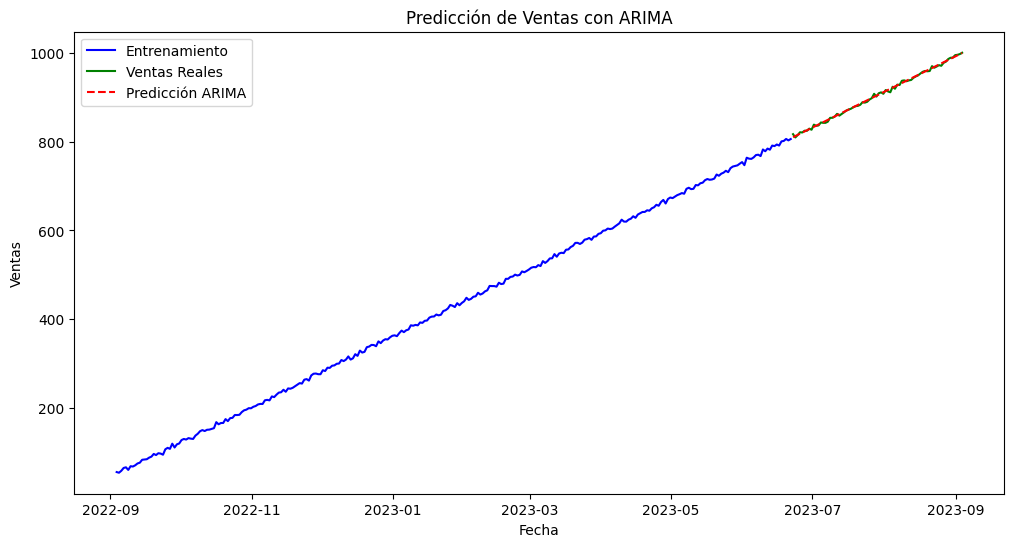

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Entreno el modelo ARIMA y le pido las predicciones
model = auto_arima(train, seasonal=False, trace=True, suppress_warnings=True)
n_periods = len(test)
predictions = model.predict(n_periods=n_periods)

#Creo un df con los valores reales para plotearlos a la vez que las predicciones y
#comparar visualemnte en el ploteo
test_index = test.index
pred_df = pd.DataFrame({'Fecha': test_index, 'Ventas Reales': test.values, 'Predicción': predictions})
pred_df.set_index('Fecha', inplace=True)

#Y lo ploteo
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Entrenamiento", color="blue")
plt.plot(test.index, test, label="Ventas Reales", color="green")
plt.plot(pred_df.index, pred_df['Predicción'], label="Predicción ARIMA", color="red", linestyle="dashed")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.title("Predicción de Ventas con ARIMA")
plt.legend()
plt.show()

#Vemos que, efectivamente, la predicción ha funcionado bien y los valores predichos
#son muy cercanos a los reales. Tenemos que la predicción del modelo es simplemente
#una continuación de la recta que se puede intuir visualmente, manteniendo la pendiente
#y comenzando en un valor cercano al último que ha visto el modelo

In [23]:
#En el último paso indican que guardemos en archivo en la carpeta correspondiente (?)
import joblib
joblib.dump(model, '/content/modelo_arima.pkl')

['/content/modelo_arima.pkl']